In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [2]:
with open('./census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [3]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [4]:
model_naive = GaussianNB()

In [5]:
model_naive.fit(X_census_treinamento, y_census_treinamento)

GaussianNB()

In [6]:
predictions = model_naive.predict(X_census_teste)

In [7]:
predictions

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [8]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [9]:
accuracy_score(y_census_teste, predictions)

0.4767656090071648

0.4767656090071648

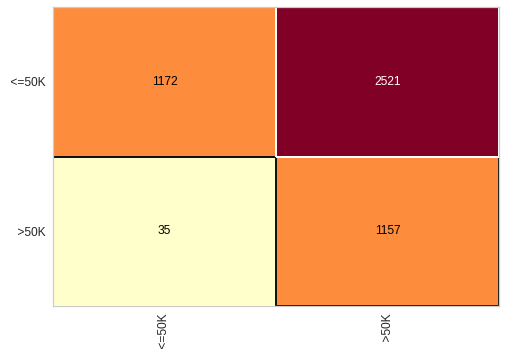

In [12]:
cm = ConfusionMatrix(model_naive)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

**O algoritmo até funciona bem pra classificar quem ganha mais de 50 mil, mas funciona muito mal classificando quem ganha menos. Isso vai poder ser visto em porcentagem no recall.**

In [14]:
print(classification_report(y_census_teste, predictions))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



Precision – What percent of your predictions were correct?
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

TP – True Positives
FP – False Positives

Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)



Recall – What percent of the positive cases did you catch? 

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.


FN – False Negatives


Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)